In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the dataset
file_path = '/content/crop_yield.csv'
data = pd.read_csv(file_path)

In [30]:
# Label encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [31]:
# Prepare features and target variable
X = data.drop(columns=['Production'])  # Features
y = data['Production']  # Target variable

In [32]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Group the data by 'Crop_Year' and sum the 'Production' for each year
yearly_production = data.groupby('Crop_Year')['Production'].sum().reset_index()


Mean Squared Error: 433881912016054.3
R^2 Score: 0.9942928542321964


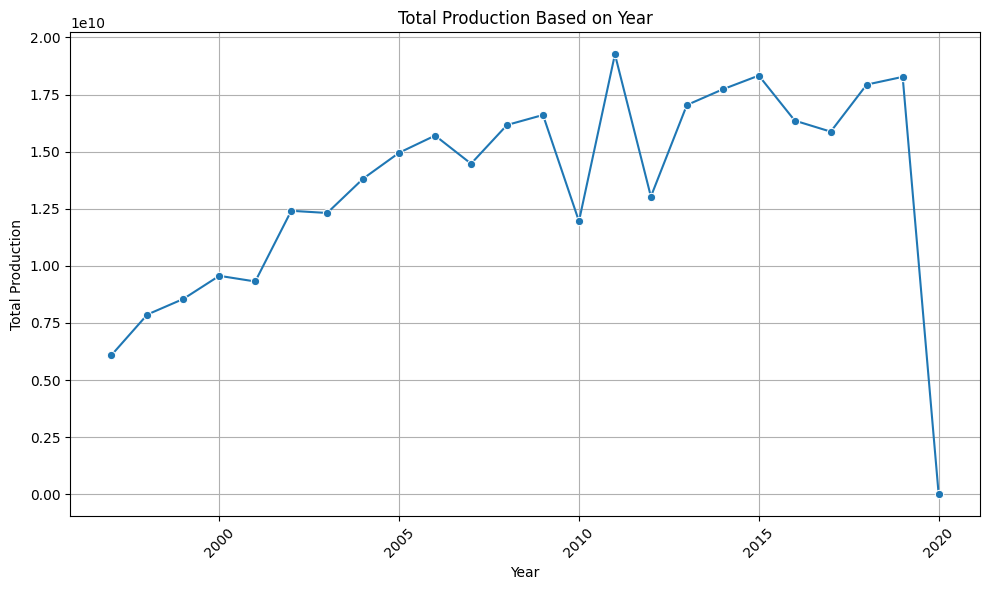

In [34]:
# Plot the total production for each year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Production', data=yearly_production, marker='o')
plt.title('Total Production Based on Year')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

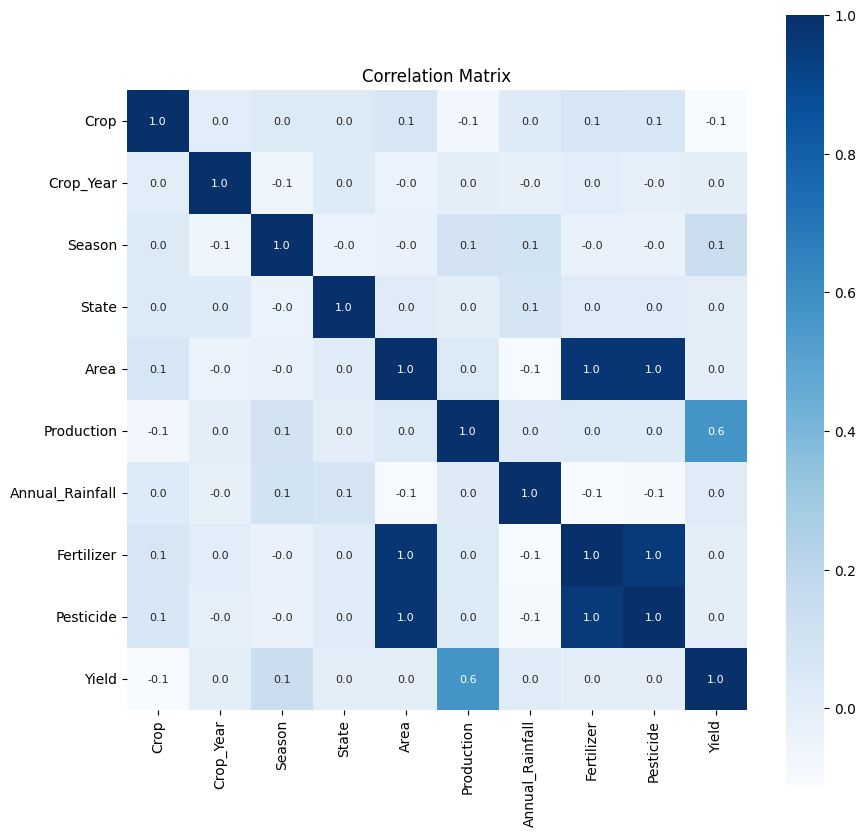

In [35]:
data_numeric = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation = data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()
